In [1]:
import sys
sys.path.append('/home/fenglab/Desktop/transdiff_GRN/src/')

from find_modules import *
from topology import *

In [2]:
with open('./../data/count_matrix.csv', 'r') as f:
    lines = f.readlines()
entrez_ids = {line.split(',')[0]:line.split(',')[2] for line in lines[1:]}

with open('./../data/QuickGO-annotations-TFs.tsv', 'r') as f:
    lines = f.readlines()
tfs = [line.split('\t')[2] for line in lines[1:]]

with open('./../data/grn_expression.txt', 'r') as f:
    lines = f.readlines()
genes = [line.split('\t')[0] for line in lines[1:]]

grntfs = list(set(tfs)&set(genes))

In [20]:
treatments = ['Anp', 'AMn', 'AMp', 'AMnp']
colors = {'Anp':'#0088ff', 'AMn':'#ff6f00', 'AMp':'#00e883', 'AMnp':'#ffbf00'}

def read_topology(file):
    df = pd.read_csv(file, sep='\t', index_col=False)
    df = df[~(df['sigma'].isnull())&(df['sigma']!=np.inf)]
    df = df.sort_values(by=['nodes', 'edges'])
    return df

def plot_parameters(df, x='nodes', y='sigma', component='positive', rolling=30):
    ax_x = df[df['component']==component][x].rolling(rolling).mean()
    ax_y = df[df['component']==component][y].rolling(rolling).mean()
    stds = df[df['component']==component][y].rolling(rolling).std(ddof=9)
    return ax_x, ax_y, stds

In [21]:
d_anp = read_topology(f'./../results/topology_{treatments[0]}.txt')
d_amn = read_topology(f'./../results/topology_{treatments[1]}.txt')
d_amp = read_topology(f'./../results/topology_{treatments[2]}.txt')
d_amnp = read_topology(f'./../results/topology_{treatments[3]}.txt')

In [58]:
dt = d_anp[(d_anp['run']==1)&(d_anp['component']=='positive')]
dt['select_step'] = (dt['nodes']/50).to_numpy(dtype=int)
dt.drop_duplicates(subset='select_step', keep='first')
dt['threshold']

/home/fenglab/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,treatment,run,threshold,component,nodes,edges,sigma,dominating_size,alpha,xmin,exp_r,exp_p,logn_r,logn_p,select_step
236,Anp,1,0.672,positive,24,27,0.802034,15,2.727614,2.0,-1.063371,7.860145e-02,-0.898256,0.152331,0
193,Anp,1,0.586,positive,50,97,1.262926,29,2.035143,2.0,-5.674339,2.717425e-02,-5.403921,0.040051,1
178,Anp,1,0.556,positive,131,253,1.878843,83,2.423521,3.0,-2.540021,4.312723e-01,-3.268244,0.084233,2
175,Anp,1,0.550,positive,150,293,2.881218,91,2.680305,4.0,-1.561718,5.204235e-01,-2.034850,0.156294,3
167,Anp,1,0.534,positive,201,506,3.366274,114,2.607533,5.0,-0.765786,7.949866e-01,-1.836559,0.165629,4
145,Anp,1,0.490,positive,251,837,3.928859,127,3.214515,10.0,-2.833920,9.785043e-02,-2.464447,0.115947,5
127,Anp,1,0.454,positive,301,1263,3.377099,155,3.498248,14.0,-3.461262,3.736740e-02,-3.094068,0.094764,6
103,Anp,1,0.406,positive,350,2156,3.030842,159,9.022702,41.0,0.206172,5.781024e-01,-2.156517,0.304125,7
80,Anp,1,0.360,positive,400,3505,2.838309,162,4.332484,33.0,-5.048473,7.979169e-04,-6.432926,0.042560,8
55,Anp,1,0.310,positive,452,5890,2.329481,169,4.897289,53.0,-5.518263,1.809630e-06,-10.123144,0.013192,9


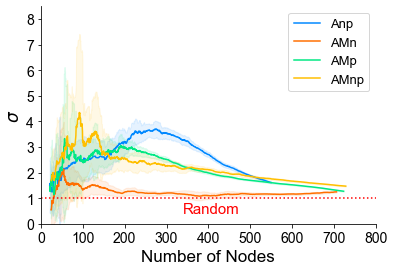

In [29]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='sigma', component='positive', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='sigma', component='positive', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='sigma', component='positive', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='sigma', component='positive', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.axhline(y=1, color='red', linestyle=':')
plt.text(340, 0.4, 'Random', fontsize=15, color='red')
plt.xlim(left=0, right=800)
plt.ylim(bottom=0, top=8.5)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(r'$\sigma$', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

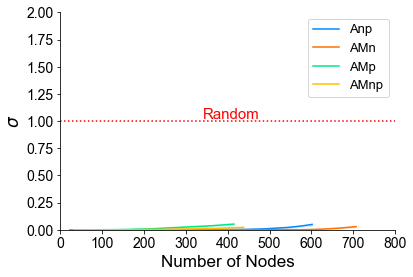

In [32]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='sigma', component='negative', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='sigma', component='negative', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='sigma', component='negative', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='sigma', component='negative', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.axhline(y=1, color='red', linestyle=':')
plt.text(340, 1.02, 'Random', fontsize=15, color='red')
plt.xlim(left=0, right=800)
plt.ylim(bottom=0, top=2)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(r'$\sigma$', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

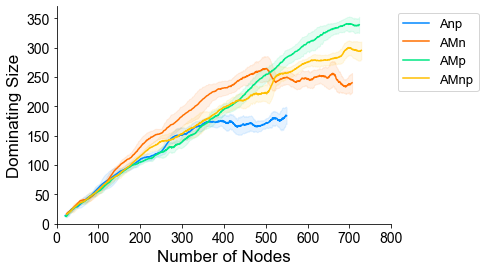

In [43]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='dominating_size', component='positive', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='dominating_size', component='positive', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='dominating_size', component='positive', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='dominating_size', component='positive', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.xlim(left=0, right=800)
plt.ylim(bottom=0)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Dominating Size', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

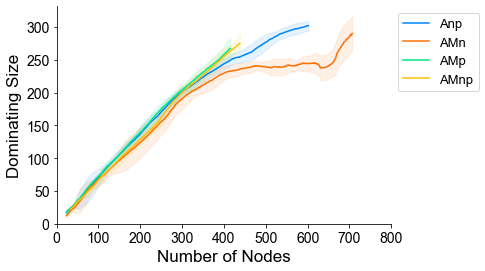

In [44]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='dominating_size', component='negative', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='dominating_size', component='negative', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='dominating_size', component='negative', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='dominating_size', component='negative', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.xlim(left=0, right=800)
plt.ylim(bottom=0)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Dominating Size', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

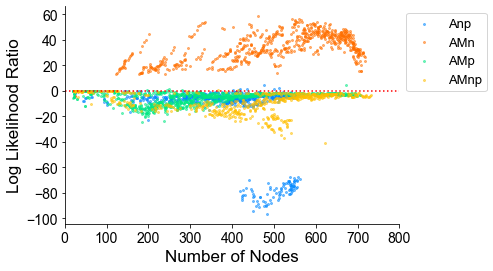

In [34]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='positive')]['nodes'], 
            d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='positive')]['exp_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='positive')]['nodes'], 
            d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='positive')]['exp_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='positive')]['nodes'], 
            d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='positive')]['exp_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='positive')]['nodes'], 
            d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='positive')]['exp_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.axhline(y=0, color='red', linestyle=':')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

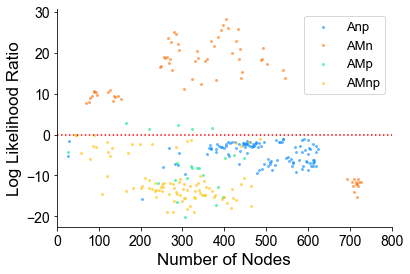

In [35]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='negative')]['nodes'], 
            d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='negative')]['exp_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='negative')]['nodes'], 
            d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='negative')]['exp_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='negative')]['nodes'], 
            d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='negative')]['exp_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='negative')]['nodes'], 
            d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='negative')]['exp_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.axhline(y=0, color='red', linestyle=':')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

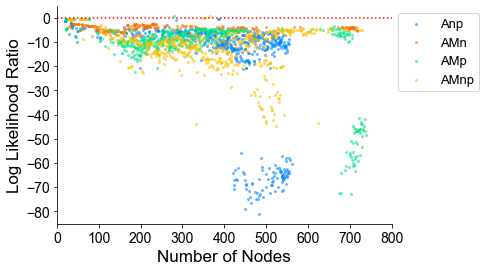

In [37]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='positive')]['nodes'], 
            d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='positive')]['logn_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='positive')]['nodes'], 
            d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='positive')]['logn_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='positive')]['nodes'], 
            d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='positive')]['logn_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='positive')]['nodes'], 
            d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='positive')]['logn_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.axhline(y=0, color='red', linestyle=':')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

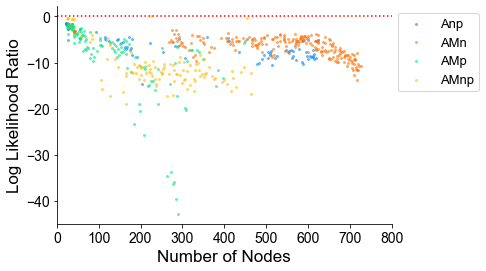

In [38]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='negative')]['nodes'], 
            d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='negative')]['logn_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='negative')]['nodes'], 
            d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='negative')]['logn_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='negative')]['nodes'], 
            d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='negative')]['logn_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='negative')]['nodes'], 
            d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='negative')]['logn_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.axhline(y=0, color='red', linestyle=':')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')